# 1. Setup and Dependencies

In [15]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler


# 2. Data Loading and Initial Analysis

In [7]:
expanded_df = pd.read_csv('student_exam_scores.csv')

print("Expanded Dataset Details:")
print("-" * 50)
print(f"Number of rows: {expanded_df.shape[0]}")
print(f"Number of columns: {expanded_df.shape[1]}")
print("\nColumns in the dataset:")
print(expanded_df.columns.tolist())
print("\nFirst few rows of the dataset:")
print(expanded_df.head())
print("\nDataset information:")
print(expanded_df.info())
print("\nNumerical columns description:")
print(expanded_df.describe())
print("\nMissing values count:")
print(expanded_df.isnull().sum())

Expanded Dataset Details:
--------------------------------------------------
Number of rows: 30641
Number of columns: 15

Columns in the dataset:
['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore']

First few rows of the dataset:
   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regula

# 3. Data Cleaning - Handling Missing Values

In [8]:
def handle_missing_values(df):
    df_cleaned = df.copy()

    df_cleaned['NrSiblings'].fillna(df_cleaned['NrSiblings'].median(), inplace=True)

    df_cleaned['EthnicGroup'].fillna(df_cleaned['EthnicGroup'].mode()[0], inplace=True)
    
    df_cleaned['ParentEduc'].fillna(df_cleaned['ParentEduc'].mode()[0], inplace=True)
    
    df_cleaned['TestPrep'].fillna(df_cleaned['TestPrep'].mode()[0], inplace=True)
    
    df_cleaned['ParentMaritalStatus'].fillna(df_cleaned['ParentMaritalStatus'].mode()[0], inplace=True)
    
    df_cleaned['PracticeSport'].fillna(df_cleaned['PracticeSport'].mode()[0], inplace=True)
    
    df_cleaned['IsFirstChild'].fillna(df_cleaned['IsFirstChild'].mode()[0], inplace=True)
    
    df_cleaned['TransportMeans'].fillna(df_cleaned['TransportMeans'].mode()[0], inplace=True)
    
    df_cleaned['WklyStudyHours'].fillna(df_cleaned['WklyStudyHours'].mode()[0], inplace=True)
    
    return df_cleaned

df_cleaned = handle_missing_values(expanded_df)

print("Missing values after cleaning:")
print(df_cleaned.isnull().sum())

print("\nNumerical columns description after cleaning:")
print(df_cleaned.describe())

print("\nDataset shape comparison:")
print(f"Original shape: {expanded_df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

print("\nPercentage of imputed values per column:")
for column in df_cleaned.columns:
    original_missing = expanded_df[column].isnull().sum()
    if original_missing > 0:
        percentage = (original_missing / len(expanded_df)) * 100
        print(f"{column}: {percentage:.2f}%")

Missing values after cleaning:
Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

Numerical columns description after cleaning:
         Unnamed: 0    NrSiblings     MathScore  ReadingScore  WritingScore
count  30641.000000  30641.000000  30641.000000  30641.000000  30641.000000
mean     499.556607      2.138409     66.558402     69.377533     68.418622
std      288.747894      1.420707     15.361616     14.758952     15.443525
min        0.000000      0.000000      0.000000     10.000000      4.000000
25%      249.000000      1.000000     56.000000     59.000000     58.000000
50%      500.000000      2.000000     67.000000     70.000000     69.000000
75

C:\Users\affan\AppData\Local\Temp\ipykernel_2684\1026813052.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['NrSiblings'].fillna(df_cleaned['NrSiblings'].median(), inplace=True)
C:\Users\affan\AppData\Local\Temp\ipykernel_2684\1026813052.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

# 4. Feature Engineering - Encoding Categorical Variables

In [14]:
def encode_categorical_variables(df):
    df_encoded = df.copy()
    
    categorical_columns = [
        'EthnicGroup', 
        'ParentEduc',
        'LunchType',
        'TestPrep',
        'ParentMaritalStatus',
        'PracticeSport',
        'TransportMeans'
    ]
    
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    
    encoded_data = encoder.fit_transform(df_encoded[categorical_columns])
    
    feature_names = encoder.get_feature_names_out(categorical_columns)
    
    encoded_df = pd.DataFrame(
        encoded_data,
        columns=feature_names,
        index=df_encoded.index
    )
    
    le = LabelEncoder()
    df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])
    df_encoded['IsFirstChild'] = le.fit_transform(df_encoded['IsFirstChild'])
    
    study_hours_map = {
        '< 5': 0,
        '5 - 10': 1,
        '10 - 15': 2,
        '> 15': 3
    }
    df_encoded['WklyStudyHours'] = df_encoded['WklyStudyHours'].map(study_hours_map)
    
    df_encoded = df_encoded.drop(columns=categorical_columns)
    
    final_df = pd.concat([df_encoded, encoded_df], axis=1)
    
    return final_df

df_encoded = encode_categorical_variables(df_cleaned)

print("Shape before encoding:", df_cleaned.shape)
print("Shape after encoding:", df_encoded.shape)

print("\nFirst few rows of encoded dataset:")
print(df_encoded.head())

print("\nColumns in encoded dataset:")
print(df_encoded.columns.tolist())

print("\nData types of columns:")
print(df_encoded.dtypes)

print("\nVerify no object datatypes remain:")
print(df_encoded.select_dtypes(include=['object']).columns)

Shape before encoding: (30641, 15)
Shape after encoding: (30641, 32)

First few rows of encoded dataset:
   Unnamed: 0  Gender  IsFirstChild  NrSiblings  WklyStudyHours  MathScore  \
0           0       0             1         3.0             0.0         71   
1           1       0             1         0.0             1.0         69   
2           2       0             1         4.0             0.0         87   
3           3       1             0         1.0             1.0         45   
4           4       1             1         0.0             1.0         76   

   ReadingScore  WritingScore  EthnicGroup_group A  EthnicGroup_group B  ...  \
0            71            74                  0.0                  0.0  ...   
1            90            88                  0.0                  0.0  ...   
2            93            91                  0.0                  1.0  ...   
3            56            42                  1.0                  0.0  ...   
4            78           

# 5. Feature Scaling:  

c:\Users\affan\Desktop\pucit\semester6\ML\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30641.
  res = hypotest_fun_out(*samples, **kwds)


NrSiblings: Non-normal distribution - Using MinMaxScaler

Summary statistics of scaled numerical features:
         NrSiblings
count  30641.000000
mean       0.305487
std        0.202958
min        0.000000
25%        0.142857
50%        0.285714
75%        0.428571
max        1.000000


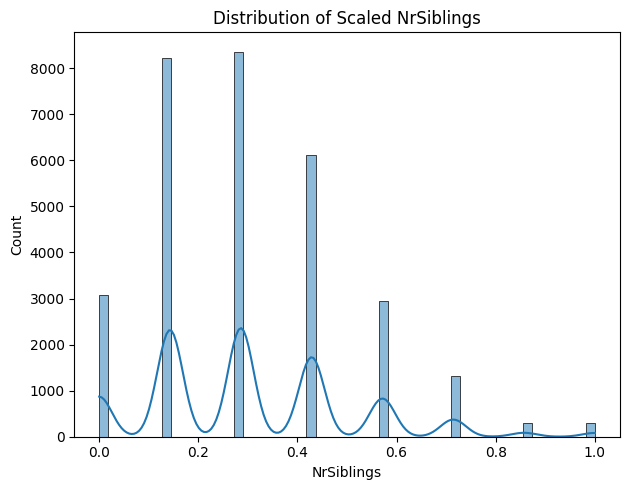

In [19]:
def scale_features(df):
    df_scaled = df.copy()
    
    numerical_columns = ['NrSiblings']
    
    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()
    
    for col in numerical_columns:
        statistic, p_value = stats.shapiro(df_scaled[col])
        
        if p_value > 0.05:
            df_scaled[col] = standard_scaler.fit_transform(df_scaled[[col]])
            print(f"{col}: Normal distribution - Using StandardScaler")
        else:
            df_scaled[col] = minmax_scaler.fit_transform(df_scaled[[col]])
            print(f"{col}: Non-normal distribution - Using MinMaxScaler")
    
    return df_scaled

df_scaled = scale_features(df_encoded)

print("\nSummary statistics of scaled numerical features:")
print(df_scaled[['NrSiblings']].describe())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_scaled, x='NrSiblings', kde=True)
plt.title('Distribution of Scaled NrSiblings')

plt.tight_layout()
plt.show()

df_encoded = df_scaled

# 5. Data Splitting - Training and Testing Sets

In [16]:
def split_dataset(df, test_size=0.2, random_state=42):
    # Separate features (X) and target variables (y)
    # Remove the 'Unnamed: 0' column as it's just an index
    features = df.drop(['Unnamed: 0', 'MathScore', 'ReadingScore', 'WritingScore'], axis=1)
    targets = df[['MathScore', 'ReadingScore', 'WritingScore']]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        features, targets, test_size=test_size, random_state=random_state
    )
    
    return X_train, X_test, y_train, y_test

# Apply the splitting
X_train, X_test, y_train, y_test = split_dataset(df_encoded)

# Print the shapes of the resulting datasets
print("Training set shape:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nTesting set shape:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

# Display first few rows of training data
print("\nFirst few rows of X_train:")
print(X_train.head())
print("\nFirst few rows of y_train:")
print(y_train.head())

# Verify the split ratio
print(f"\nTraining set percentage: {len(X_train) / len(df_encoded):.2%}")
print(f"Testing set percentage: {len(X_test) / len(df_encoded):.2%}")

Training set shape:
X_train: (24512, 28)
y_train: (24512, 3)

Testing set shape:
X_test: (6129, 28)
y_test: (6129, 3)

First few rows of X_train:
       Gender  IsFirstChild  NrSiblings  WklyStudyHours  EthnicGroup_group A  \
9061        1             1         4.0             1.0                  1.0   
26137       1             0         1.0             1.0                  0.0   
16599       1             1         1.0             0.0                  0.0   
21992       0             0         1.0             1.0                  0.0   
18672       1             1         3.0             1.0                  0.0   

       EthnicGroup_group B  EthnicGroup_group C  EthnicGroup_group D  \
9061                   0.0                  0.0                  0.0   
26137                  0.0                  0.0                  0.0   
16599                  0.0                  0.0                  1.0   
21992                  0.0                  1.0                  0.0   
18672        